In [25]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
val_path="Vegetable Images/validation"
train_path="Vegetable Images/train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [27]:
class_names = train_dataset.class_names
print(len(class_names))

15


In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))


In [29]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [30]:
history = model.fit(x=train_dataset,
                    epochs= 7,
                    validation_data=val_dataset,)

Epoch 1/7
469/469 [==============================] - 492s 1s/step - loss: 1.0130 - accuracy: 0.6835 - val_loss: 0.8986 - val_accuracy: 0.7483
Epoch 2/7
469/469 [==============================] - 491s 1s/step - loss: 0.4167 - accuracy: 0.8691 - val_loss: 0.8577 - val_accuracy: 0.7753
Epoch 3/7
469/469 [==============================] - 490s 1s/step - loss: 0.2806 - accuracy: 0.9135 - val_loss: 0.5534 - val_accuracy: 0.8480
Epoch 4/7
469/469 [==============================] - 494s 1s/step - loss: 0.2171 - accuracy: 0.9297 - val_loss: 0.3869 - val_accuracy: 0.8890
Epoch 5/7
469/469 [==============================] - 490s 1s/step - loss: 0.1624 - accuracy: 0.9469 - val_loss: 0.4929 - val_accuracy: 0.8680
Epoch 6/7
469/469 [==============================] - 493s 1s/step - loss: 0.1352 - accuracy: 0.9564 - val_loss: 0.1546 - val_accuracy: 0.9570
Epoch 7/7
469/469 [==============================] - 491s 1s/step - loss: 0.1249 - accuracy: 0.9586 - val_loss: 0.1408 - val_accuracy: 0.9607


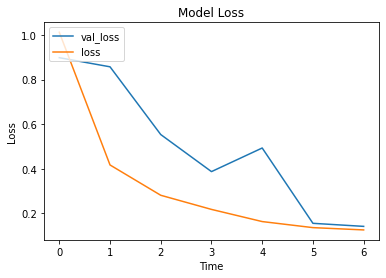

In [31]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

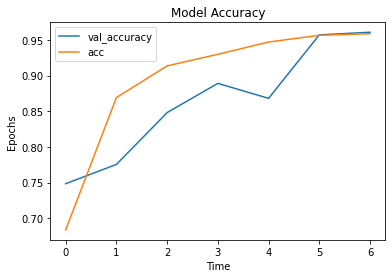

In [32]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

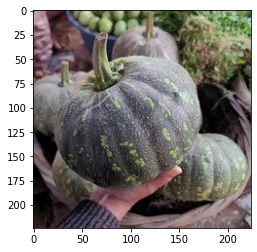

1/1 [==============================] - 0s 149ms/step
Actual: pumpkin
Predicted: Pumpkin


In [34]:
from keras_preprocessing import image
image_path="Vegetable Images/test/pumpkin/1010.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

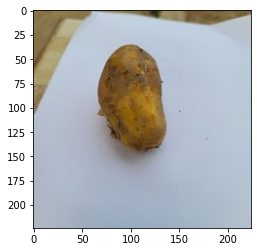

1/1 [==============================] - 0s 27ms/step
Actual: potato
Predicted: Potato


In [35]:
from keras_preprocessing import image
image_path="Vegetable Images/test/potato/1001.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

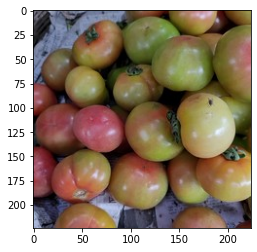

1/1 [==============================] - 0s 30ms/step
Actual: tomato
Predicted: Tomato


In [36]:
from keras_preprocessing import image
image_path="Vegetable Images/test/tomato/1023.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

In [38]:
model.save("vegetable")

INFO:tensorflow:Assets written to: vegetable\assets


INFO:tensorflow:Assets written to: vegetable\assets


In [39]:
mm = keras.models.load_model("vegetable")

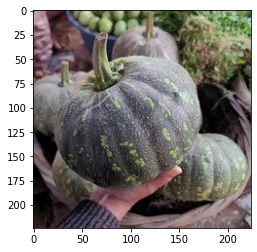

1/1 [==============================] - 0s 112ms/step
Actual: pumpkin
Predicted: Pumpkin


In [41]:
from keras_preprocessing import image
image_path="Vegetable Images/test/pumpkin/1010.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = mm.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

In [44]:
model.evaluate(val_dataset)

94/94 [==============================] - 18s 189ms/step - loss: 0.1408 - accuracy: 0.9607


[0.14084701240062714, 0.9606666564941406]